In [1]:
%pip install pandas scikit-learn matplotlib

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 21.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.7 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.6 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 50.2 MB/s eta 0:00:00
Using cached pypa

In [2]:
import pandas as pd

In [14]:
df = pd.read_excel("default of credit card clients.xls", header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
df.rename(columns={"default payment next month": "default"}, inplace=True)

In [17]:
df.drop('ID', axis=1, inplace=True) #axis 0 is remove rows and axis 1 is to remove columns

Identify and deal with Missing data

There are two methods to deal with the missing data
 -  We remove the rows that contain the missing data from the dataset
 -  We can impute the values that are missing

In [18]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

In [20]:
df['SEX'].unique()

array([2, 1])

In [21]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [22]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [27]:
len(df[(df['MARRIAGE'] == 0) | (df['EDUCATION'] == 0)])

68

In [28]:
len(df)

30000

Less than 1% has missing values , so we try to drop them instead of imputing

In [29]:
df_no_missing = df.loc[(df['MARRIAGE'] != 0) & (df['EDUCATION'] != 0)]

In [30]:
len(df_no_missing)

29932

In [31]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [32]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3])

In [33]:
len(df_no_missing)

29932

Downsample the data

Support Vector Machines are great with small datasets, but not awesome with large ones. This dataset is not huge, but big enough to take a long time to optimize the Cross Validation. So we will downsample both categories, customers who did and did not default to 1000 each

In [34]:
df_no_fault = df_no_missing[df_no_missing['default'] == 0]
df_fault = df_no_missing[df_no_missing['default'] == 1]

Now downsample the dataset that did not default

In [35]:
df_no_default_downsampled = df_no_fault.sample(n = 1000, random_state=42)

In [37]:
df_default_downsampled = df_fault.sample(n = 1000, random_state=42)

In [38]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

In [39]:
y = df_downsample['default'].copy()
X = df_downsample.drop('default', axis=1).copy()


SEX, EDUCATION, MARRIAGE, PAY_ are supposed to be categorical and need to be modified. This is because while scikit learn support Support Vector Machines nativelt support continuous data, like AGE, LIMIT_BAL.

What is the issue with treating categorical data like continuous data?
In case of Marriage column, we have 3 options: 1. Married, 2. Single, 3.Other

If we treat these values 1,2, and 3 like continuous data, then we would assume that 3, which means "Other" is more similar to 2 which is single than it is to 1, which means "Married"

There are two different ways to do One-Hot eNCODING IN PYTHON. 
1. ColumnTransformer() from scikit-learn
2. get_dummies() from pandas

ColumnTransformer() creates a persistent function that can validate data that we get in the future. It remembers the options during the training and if the new value comes later, it may throw error or may handle it in some other nice way. Downside of it is it turns data into an array and looses all the column names.

get_dummies() leaves data in a dataframe and retains the column names. It does not have persistent behavior

In [41]:
pd.get_dummies(X, columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,True,False,False
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,True,False,False
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,True,False,False
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,False,True,False
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,True,False,False


In [42]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [43]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [44]:
X_encoded = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 
                                       'MARRIAGE', 'AGE', 
                                       'PAY_0', 'PAY_2',
                                       'PAY_3', 'PAY_4', 
                                       'PAY_5', 'PAY_6'])

In [46]:
X_encoded = X_encoded.astype(int)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [50]:
from sklearn.preprocessing import scale

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

Build a Preliminary Support Vector Machine

In [52]:
from sklearn.svm import SVC

In [53]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

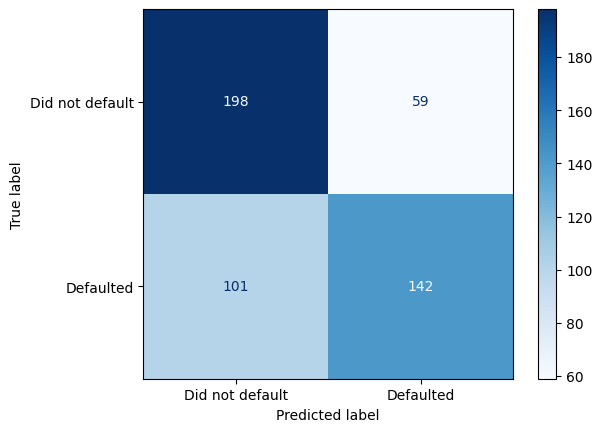

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test_scaled,
        y_test,
        display_labels= ["Did not default", "Defaulted"],
        cmap=plt.cm.Blues,
    )

Optimize Parameters with Cross Validation and GridSearchCV()

Optimizing a Support Vector Machine is all about finding the best value for gamma, and potentially the regularization parameter, C.

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'C': [0.5, 1, 10, 100], #C >0 (C is regularization parameter)
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    }
]

optimal_params = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [64]:
clf_svm = SVC(random_state=42, C=10, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.001, random_state=42)

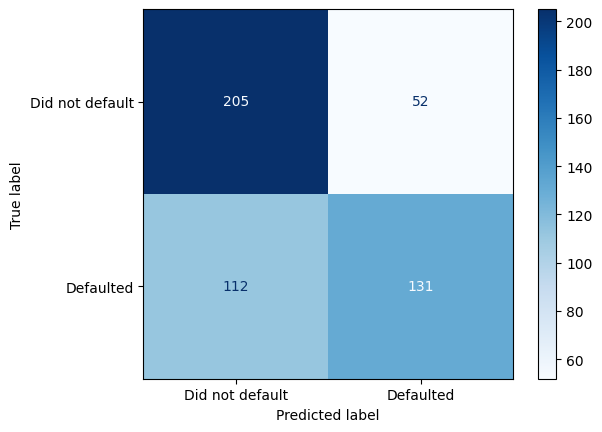

In [65]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test_scaled,
        y_test,
        display_labels= ["Did not default", "Defaulted"],
        cmap=plt.cm.Blues,
    )

In [67]:
len(df_downsample.columns)

24

We see there are 24 features or columns in X. This is a problem because it would require 24-dimensional graph, one dimension per feature is used to make predictions.

So we will now use PCA (Principal Component Analysis) to combine the 24 features into 2 orthogonal meta-features that we can use as an axes for a graph.

However, before we shrink the graph, we need to first determine how accurate the shrunken graph will be. We can determine the accuracy of the graph by drawing something called a scree plot

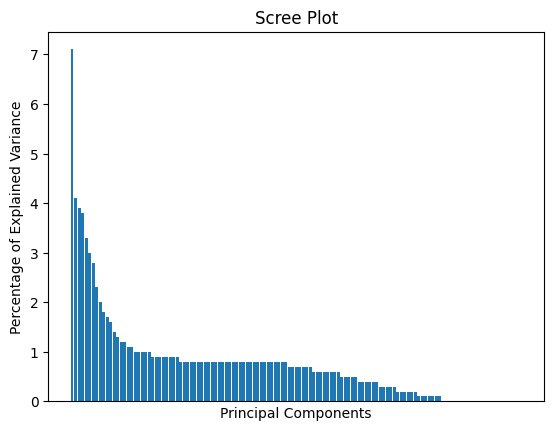

In [68]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False
)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()


In [71]:
X_train_pca.shape

(1500, 129)

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting